1. What is a Support Vector Machine (SVM)
 - SVM is a supervised learning algorithm used for classification and regression.
Its goal is to find the best separating hyperplane that maximizes the margin (distance between the decision boundary and the closest points of each class).

2. What is the difference between Hard Margin and Soft Margin SVM
 - Hard Margin :
 - No noise allowed
 - Must classify all points correctly
 - Perfectly separable data
 - Soft Margin :
 - Allows misclassification
 - Maximizes margin + minimizes misclassification
 - Real-world noisy data

3.What is the mathematical intuition behind SVM
 - The mathematical intuition behind SVM is to find the hyperplane that best separates two classes of data by maximizing the margin between them
 - The distance between these two hyperplanes is \(2/||w||)
 - To maximize this margin, SVM minimizes (||w||)
 - The constraints are that every data point (xi) must be on or outside the margins, which can be written as: (yi(w.xi+b) >= 1)

4. What is the role of Lagrange Multipliers in SVM
 - SVM has constraints, so we convert it into a dual optimization problem using Lagrange multipliers (αᵢ):
 - They allow enforcing the margin constraints using optimization.
 - They identify which points become support vectors (points with αᵢ > 0).
 - The dual form enables the kernel trick, making nonlinear SVM possible

5. What are Support Vectors in SVM
 - Support vectors are the data points that:
 - lie closest to the hyperplane,
 - have the smallest margin,
 - determine the orientation and position of the hyperplane.
 - Removing other points does not change the boundary—support vectors are the critical points.

6. What is a Support Vector Classifier (SVC)
 - SVC is the classification implementation of SVM that:
 - finds a margin-maximizing hyperplane,
 - allows soft margins with parameter C,
 - supports linear and nonlinear kernels.

7. What is a Support Vector Regressor (SVR)
 - SVR applies SVM concepts to regression:
 - tries to fit a function within a tube (ε-insensitive zone),
 - penalizes points outside the tube,
 - uses kernel functions as well.

8. What is the Kernel Trick in SVM
 - The kernel trick maps data into a higher-dimensional space without explicitly transforming it.
 - Instead of computing φ(x) manually, SVM replaces: ϕ(xi)^Tϕ(xj)
 - with a kernel function: K(xi,xj)

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel
 - Linear Kernel:
 - Linearly separable data or high-dimensional data.
 - Computes the dot product, resulting in a flat, linear decision boundary. It is simple and computationally efficient
 - Text classification, where each word can be a feature
 - Polynomial Kernel:
 - Data with polynomial (curved) patterns.
 - Creates a non-linear decision boundary. The degree of the polynomial is a hyperparameter that controls the complexity of the boundary
 - Image recognition tasks where data patterns are not strictly linear
 - RBF (Radial Basis Function) Kernel:
 - Complex, non-linear problems, especially when the data's structure is not well-understood
 - Can capture complex relationships without prior knowledge of the data, making it a good default for non-linear problems. It is sensitive to hyperparameters like gamma and C, which require careful tuning.
 - Any data with complex, non-linear shapes, such as spiraling or circular patterns

10. What is the effect of the C parameter in SVM
 - C controls the trade-off between margin size and misclassification.
 - High C → less margin, fewer misclassifications → risk of overfitting
 - Low C → large margin, more misclassifications allowed → risk of underfitting

11. What is the role of the Gamma parameter in RBF Kernel SVM
 - Gamma controls how far the influence of a training point reaches.
 - High gamma → each point has short, sharp influence → overfitting
 - Low gamma → smoother, broader influence → underfitting

12. What is the Naïve Bayes classifier, and why is it called "Naïve"
 - Naïve Bayes is a probabilistic classifier based on Bayes’ Theorem.
 - It's called naïve because it assumes:
 - all features are independent
 - given the class label.
 - This assumption is rarely true → but works very well in practice, especially for text.

13. What is Bayes Theorem
 - P(Y|X)=P(Y)P(X|Y)/P(X)
 - It calculates the probability of a class Y given features X.

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes:
 - Gaussian Naïve Bayes:
 - Features are continuous and follow a normal (Gaussian) distribution.
 - Calculates the mean and standard deviation for each feature and class to estimate probabilities.
 - Multinomial Naïve:
 - Features represent counts or frequencies of items, such as words in a document.
 - Uses the frequencies of features to calculate the probability of a document belonging to a certain class.
 - Bernoulli Naïve Bayes:
 - Features represent the presence (1) or absence (0) of a feature, like whether a word is in a document.
 - Models each feature as a binary variable and calculates the probability of presence or absence.

15. When should you use Gaussian Naïve Bayes over other variants
 - Use it when input features are continuous and approximately follow a normal distribution.
 - Examples:
 - Iris dataset
 - Sensor measurements
 - Continuous medical data

16. What are the key assumptions made by Naïve Bayes
 - Features are independent given the class.
 - All features contribute equally.
 - The likelihood is modeled using appropriate distributions (Gaussian, multinomial, etc.)

17. What are the advantages and disadvantages of Naïve Bayes
 - Advantages
 - Fast training and prediction
 - Works well with high-dimensional data
 - Good for text classification (bag-of-words)
 - Disadvantages
 - Independence assumption is unrealistic
 - Performs poorly when features are correlated
 - Zero-frequency problem (handled by Laplace smoothing)

18. Why is Naïve Bayes a good choice for text classification
 - Words behave approximately independently.
 - Text data is high dimensional → NB handles it well.
 - Very fast even on millions of samples.
 - Works beautifully with bag-of-words and TF-IDF features.

19. Compare SVM and Naïve Bayes for classification tasks
 - Support Vector Machine (SVM):
 - Finds the optimal hyperplane to maximize the margin between classes.
 - High-dimensional data, smaller datasets, and when data is not linearly separable.
 - Naïve Bayes:
 - A probabilistic algorithm based on Bayes' theorem, assuming features are independent.
 - Text classification, spam detection, and large datasets with a large number of features.

20. How does Laplace Smoothing help in Naïve Bayes
 - Laplace smoothing helps Naïve Bayes by preventing a probability of zero when a word or feature is not found in the training data for a particular class
 - It does this by adding a small positive value (typically one) to the numerator (count of the feature) and the denominator (size of the vocabulary or class) in probability calculations, ensuring that no probability is ever exactly zero and making the model more robust




21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [1]:
# SVM classifier on Iris dataset with accuracy evaluation

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def main():
    # 1. Load the Iris dataset
    iris = datasets.load_iris()
    X = iris.data          # Features
    y = iris.target        # Labels

    # 2. Split into train and test sets
    # test_size=0.2 -> 20% test, 80% train
    # random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3. Create the SVM classifier
    # Using RBF kernel (default), you can experiment with 'linear', 'poly', etc.
    svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')

    # 4. Train the model
    svm_clf.fit(X_train, y_train)

    # 5. Make predictions on the test set
    y_pred = svm_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")

if __name__ == "__main__":
    main()


Test Accuracy: 0.9667


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies

In [2]:
# Compare Linear and RBF SVM on Wine dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def main():
    # 1. Load Wine dataset
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. Create pipelines (Scaling + SVM)
    linear_svm = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear', C=1.0))
    ])

    rbf_svm = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
    ])

    # 4. Train models
    linear_svm.fit(X_train, y_train)
    rbf_svm.fit(X_train, y_train)

    # 5. Predictions
    y_pred_linear = linear_svm.predict(X_test)
    y_pred_rbf = rbf_svm.predict(X_test)

    # 6. Accuracy evaluation
    acc_linear = accuracy_score(y_test, y_pred_linear)
    acc_rbf = accuracy_score(y_test, y_pred_rbf)

    # 7. Print comparison
    print("SVM Accuracy Comparison on Wine Dataset")
    print("-------------------------------------")
    print(f"Linear Kernel Accuracy : {acc_linear:.4f}")
    print(f"RBF Kernel Accuracy    : {acc_rbf:.4f}")

    # 8. Best model
    if acc_linear > acc_rbf:
        print("\nBest Model: Linear SVM")
    elif acc_rbf > acc_linear:
        print("\nBest Model: RBF SVM")
    else:
        print("\nBoth models perform equally")

if __name__ == "__main__":
    main()


SVM Accuracy Comparison on Wine Dataset
-------------------------------------
Linear Kernel Accuracy : 0.9556
RBF Kernel Accuracy    : 0.9778

Best Model: RBF SVM


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE)

In [3]:
# SVR on Housing Dataset with MSE Evaluation

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

def main():
    # 1. Load housing dataset
    data = fetch_california_housing()
    X = data.data
    y = data.target

    # 2. Split dataset into train & test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    # 3. Build pipeline (Scaling + SVR)
    svr_model = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1))
    ])

    # 4. Train model
    svr_model.fit(X_train, y_train)

    # 5. Make predictions
    y_pred = svr_model.predict(X_test)

    # 6. Evaluate using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}")

if __name__ == "__main__":
    main()


Mean Squared Error (MSE): 0.3164


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary

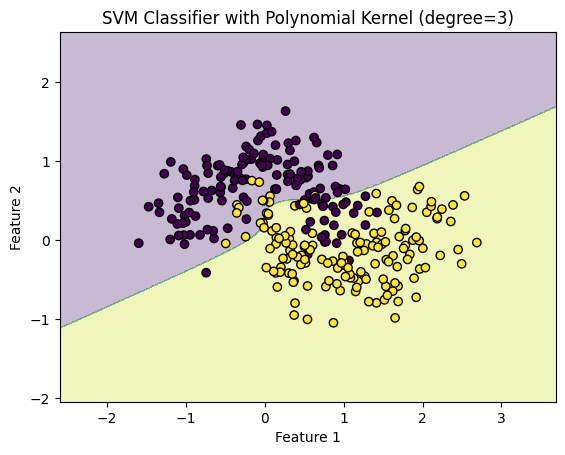

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def main():
    # 1. Generate a simple 2D dataset
    X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

    # 2. Create an SVM classifier with Polynomial kernel using a pipeline
    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="poly", degree=3, C=1.0, gamma="scale"))
    ])

    # 3. Train the classifier
    clf.fit(X, y)

    # 4. Create a mesh grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )

    # 5. Predict on the grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 6. Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.3)  # decision regions
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title("SVM Classifier with Polynomial Kernel (degree=3)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

if __name__ == "__main__":
    main()


25.  Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

In [5]:
# Gaussian Naive Bayes on Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def main():
    # 1. Load Breast Cancer dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # 2. Split dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. Initialize Gaussian Naive Bayes classifier
    model = GaussianNB()

    # 4. Train the model
    model.fit(X_train, y_train)

    # 5. Make predictions
    y_pred = model.predict(X_test)

    # 6. Evaluate model accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

if __name__ == "__main__":
    main()


Model Accuracy: 0.9371


26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset

In [6]:
# Multinomial Naive Bayes on 20 Newsgroups Dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

def main():
    # 1. Load dataset (subset='all' includes train + test)
    data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

    X = data.data
    y = data.target

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. Build Pipeline: TF-IDF + Multinomial Naive Bayes
    model = Pipeline([
        ('tfidf', TfidfVectorizer(
            stop_words='english',
            max_df=0.95,
            min_df=2,
            ngram_range=(1, 2)
        )),
        ('nb', MultinomialNB(alpha=1.0))
    ])

    # 4. Train model
    model.fit(X_train, y_train)

    # 5. Make predictions
    y_pred = model.predict(X_test)

    # 6. Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

if __name__ == "__main__":
    main()


Model Accuracy: 0.7345


27. Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually

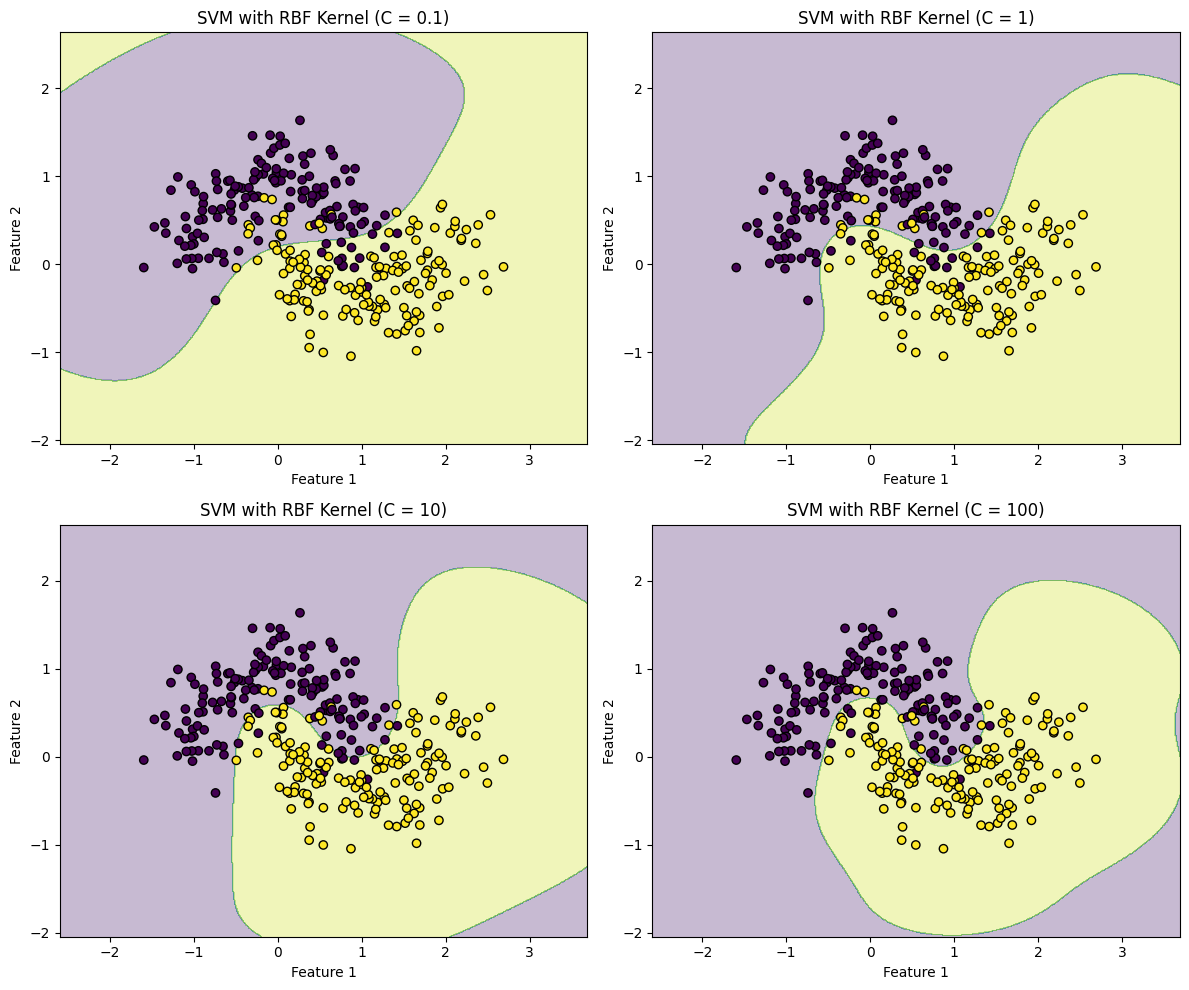

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def plot_svm_with_different_C():
    # 1. Generate a simple 2D dataset
    X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

    # 2. List of C values to compare
    C_values = [0.1, 1, 10, 100]

    # 3. Create a meshgrid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )

    # 4. Create subplots
    plt.figure(figsize=(12, 10))

    for i, C in enumerate(C_values, 1):
        # Build pipeline: Standardization + SVM (RBF kernel)
        clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm", SVC(kernel="rbf", C=C, gamma="scale"))
        ])

        # Train classifier
        clf.fit(X, y)

        # Predict on grid
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        plt.subplot(2, 2, i)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        plt.title(f"SVM with RBF Kernel (C = {C})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_svm_with_different_C()


28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features

In [8]:
# Bernoulli Naive Bayes on Binary Feature Dataset

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

def main():
    # 1. Create a synthetic dataset
    #   - 1000 samples, 20 features
    #   - 2 informative features, 2 redundant
    #   - Binary classification (0/1)
    X, y = make_classification(
        n_samples=1000,
        n_features=20,
        n_informative=5,
        n_redundant=2,
        n_classes=2,
        random_state=42
    )

    # 2. Binarize continuous features to get true binary features (0/1)
    #    Threshold = 0.0 → values > 0 become 1, else 0
    binarizer = Binarizer(threshold=0.0)
    X_binary = binarizer.fit_transform(X)

    # 3. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_binary, y, test_size=0.25, random_state=42, stratify=y
    )

    # 4. Initialize Bernoulli Naive Bayes classifier
    model = BernoulliNB(alpha=1.0)

    # 5. Train the model
    model.fit(X_train, y_train)

    # 6. Make predictions
    y_pred = model.predict(X_test)

    # 7. Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Bernoulli Naive Bayes Accuracy: {accuracy:.4f}")

if __name__ == "__main__":
    main()


Bernoulli Naive Bayes Accuracy: 0.7440


29. Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data

In [9]:
# Compare SVM performance with and without feature scaling

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

def main():
    # 1. Load dataset
    data = load_wine()
    X = data.data
    y = data.target

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. Model WITHOUT scaling
    svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_unscaled.fit(X_train, y_train)
    y_pred_unscaled = svm_unscaled.predict(X_test)
    acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

    # 4. Model WITH scaling (Pipeline)
    svm_scaled = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
    ])
    svm_scaled.fit(X_train, y_train)
    y_pred_scaled = svm_scaled.predict(X_test)
    acc_scaled = accuracy_score(y_test, y_pred_scaled)

    # 5. Print comparison
    print("SVM Performance Comparison")
    print("--------------------------")
    print(f"Without Scaling Accuracy : {acc_unscaled:.4f}")
    print(f"With Scaling Accuracy    : {acc_scaled:.4f}")

if __name__ == "__main__":
    main()


SVM Performance Comparison
--------------------------
Without Scaling Accuracy : 0.7111
With Scaling Accuracy    : 0.9778


30.  Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing

In [10]:
# Gaussian Naive Bayes: compare predictions
# before and after Laplace smoothing of class priors

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def main():
    # 1. Load a classification dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. GaussianNB WITHOUT Laplace smoothing (default)
    gnb_default = GaussianNB()
    gnb_default.fit(X_train, y_train)
    y_pred_default = gnb_default.predict(X_test)
    acc_default = accuracy_score(y_test, y_pred_default)

    # 4. Compute Laplace-smoothed class priors from training data
    classes, counts = np.unique(y_train, return_counts=True)
    n_classes = len(classes)
    n_samples = len(y_train)

    # Laplace (add-one) smoothing on class counts:
    # P(class_i) = (count_i + 1) / (n_samples + n_classes)
    smoothed_priors = (counts + 1) / (n_samples + n_classes)

    # 5. GaussianNB WITH Laplace-smoothed class priors
    #    We pass the priors explicitly and then fit as usual
    gnb_laplace = GaussianNB(priors=smoothed_priors)
    gnb_laplace.fit(X_train, y_train)
    y_pred_laplace = gnb_laplace.predict(X_test)
    acc_laplace = accuracy_score(y_test, y_pred_laplace)

    # 6. Compare predictions
    num_changed = np.sum(y_pred_default != y_pred_laplace)

    print("Gaussian Naive Bayes – Effect of Laplace Smoothing on Class Priors")
    print("------------------------------------------------------------------")
    print(f"Accuracy without Laplace smoothing : {acc_default:.4f}")
    print(f"Accuracy with Laplace smoothing    : {acc_laplace:.4f}")
    print()
    print(f"Number of test predictions changed : {num_changed} "
          f"out of {len(y_test)}")

if __name__ == "__main__":
    main()


Gaussian Naive Bayes – Effect of Laplace Smoothing on Class Priors
------------------------------------------------------------------
Accuracy without Laplace smoothing : 0.9371
Accuracy with Laplace smoothing    : 0.9371

Number of test predictions changed : 0 out of 143


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel)

In [11]:
# SVM with GridSearchCV Hyperparameter Tuning

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

def main():
    # 1. Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # 2. Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. Create pipeline (Scaling + SVM)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC())
    ])

    # 4. Define parameter grid
    param_grid = {
        'svm__kernel': ['linear', 'rbf', 'poly'],
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': ['scale', 0.01, 0.001]
    }

    # 5. Setup GridSearchCV
    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # 6. Train with Grid Search
    grid.fit(X_train, y_train)

    # 7. Best model prediction
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # 8. Evaluation
    print("Best parameters found:")
    print(grid.best_params_)
    print("\nTest Set Accuracy:")
    print(f"{accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

if __name__ == "__main__":
    main()


Best parameters found:
{'svm__C': 10, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}

Test Set Accuracy:
0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy

In [12]:
# SVM on imbalanced data: effect of class_weight

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def main():
    # 1. Create an imbalanced binary classification dataset
    X, y = make_classification(
        n_samples=5000,
        n_features=20,
        n_informative=3,
        n_redundant=2,
        n_clusters_per_class=1,
        weights=[0.95, 0.05],   # 95% of class 0, 5% of class 1 → imbalanced
        flip_y=0.01,
        random_state=42
    )

    # 2. Train-test split (stratified to keep imbalance ratio)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. SVM WITHOUT class weights
    svm_plain = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm_plain.fit(X_train, y_train)
    y_pred_plain = svm_plain.predict(X_test)
    acc_plain = accuracy_score(y_test, y_pred_plain)

    # 4. SVM WITH class_weight='balanced'
    svm_weighted = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',   # handles class imbalance
        random_state=42
    )
    svm_weighted.fit(X_train, y_train)
    y_pred_weighted = svm_weighted.predict(X_test)
    acc_weighted = accuracy_score(y_test, y_pred_weighted)

    # 5. Print accuracy comparison
    print("SVM on Imbalanced Dataset")
    print("-------------------------")
    print(f"Accuracy without class weights : {acc_plain:.4f}")
    print(f"Accuracy with class weights    : {acc_weighted:.4f}\n")

    # 6. Optional: see detailed impact on each class
    print("Classification report WITHOUT class weights:")
    print(classification_report(y_test, y_pred_plain))

    print("Classification report WITH class weights:")
    print(classification_report(y_test, y_pred_weighted))

if __name__ == "__main__":
    main()


SVM on Imbalanced Dataset
-------------------------
Accuracy without class weights : 0.9600
Accuracy with class weights    : 0.9160

Classification report WITHOUT class weights:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1181
           1       0.81      0.36      0.50        69

    accuracy                           0.96      1250
   macro avg       0.89      0.68      0.74      1250
weighted avg       0.96      0.96      0.95      1250

Classification report WITH class weights:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1181
           1       0.34      0.58      0.43        69

    accuracy                           0.92      1250
   macro avg       0.66      0.76      0.69      1250
weighted avg       0.94      0.92      0.93      1250



33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

In [13]:
# Naive Bayes Spam Detection on Email Data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

def main():
    # 1. Load email dataset
    # Make sure emails.csv has at least: 'text' and 'label' columns
    df = pd.read_csv("emails.csv")

    X = df['text']          # email content
    y = df['label']         # 'spam' / 'ham'

    # 2. Train–test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # 3. Build pipeline: TF-IDF vectorizer + Multinomial Naive Bayes
    model = Pipeline([
        ("tfidf", TfidfVectorizer(
            stop_words="english",
            max_df=0.95,      # ignore very common terms
            min_df=2          # ignore very rare terms
        )),
        ("nb", MultinomialNB(alpha=1.0))  # Laplace smoothing
    ])

    # 4. Train model
    model.fit(X_train, y_train)

    # 5. Evaluate on test data
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Test Accuracy: {acc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # 6. Try on a few custom examples
    sample_emails = [
        "Congratulations! You've won a $1000 gift card. Click here to claim now.",
        "Hi, can we reschedule our meeting to tomorrow afternoon?",
    ]
    sample_preds = model.predict(sample_emails)
    for email, pred in zip(sample_emails, sample_preds):
        print("-" * 60)
        print("Email:", email)
        print("Predicted label:", pred)

if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: 'emails.csv'

34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy

In [14]:
# Compare SVM and Naive Bayes on the same dataset (Iris)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

def main():
    # 1. Load dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 3. SVM classifier (with scaling in a pipeline)
    svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", C=1.0, gamma="scale"))
    ])
    svm_clf.fit(X_train, y_train)
    y_pred_svm = svm_clf.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred_svm)

    # 4. Gaussian Naive Bayes classifier
    nb_clf = GaussianNB()
    nb_clf.fit(X_train, y_train)
    y_pred_nb = nb_clf.predict(X_test)
    acc_nb = accuracy_score(y_test, y_pred_nb)

    # 5. Print comparison
    print("Accuracy Comparison on Iris Dataset")
    print("-----------------------------------")
    print(f"SVM Classifier Accuracy        : {acc_svm:.4f}")
    print(f"Naive Bayes Classifier Accuracy: {acc_nb:.4f}")

    # Optional: which is better?
    if acc_svm > acc_nb:
        print("\nSVM performs better on this split.")
    elif acc_nb > acc_svm:
        print("\nNaive Bayes performs better on this split.")
    else:
        print("\nBoth models perform equally on this split.")

if __name__ == "__main__":
    main()


Accuracy Comparison on Iris Dataset
-----------------------------------
SVM Classifier Accuracy        : 0.9474
Naive Bayes Classifier Accuracy: 0.9211

SVM performs better on this split.


35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results

In [15]:
# Naive Bayes with and without feature selection

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score

def main():
    # 1. Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.25,
        random_state=42,
        stratify=y
    )

    # 3. Train Naive Bayes on ALL features
    nb_all = GaussianNB()
    nb_all.fit(X_train, y_train)
    y_pred_all = nb_all.predict(X_test)
    acc_all = accuracy_score(y_test, y_pred_all)

    # 4. Feature selection (keep top k features)
    k = 10  # you can change this
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)

    # 5. Train Naive Bayes on SELECTED features
    nb_sel = GaussianNB()
    nb_sel.fit(X_train_sel, y_train)
    y_pred_sel = nb_sel.predict(X_test_sel)
    acc_sel = accuracy_score(y_test, y_pred_sel)

    # 6. Compare results
    print("Naive Bayes with and without Feature Selection")
    print("---------------------------------------------")
    print(f"Accuracy with ALL features      : {acc_all:.4f}")
    print(f"Accuracy with {k} selected feats: {acc_sel:.4f}")

    # Optional: see which features were selected
    selected_indices = selector.get_support(indices=True)
    print(f"\nSelected feature indices (0-based): {selected_indices}")
    print("Selected feature names:")
    for idx in selected_indices:
        print(f"- {idx}: {data.feature_names[idx]}")

if __name__ == "__main__":
    main()


Naive Bayes with and without Feature Selection
---------------------------------------------
Accuracy with ALL features      : 0.9371
Accuracy with 10 selected feats: 0.9231

Selected feature indices (0-based): [ 0  2  3  6  7 13 20 22 23 27]
Selected feature names:
- 0: mean radius
- 2: mean perimeter
- 3: mean area
- 6: mean concavity
- 7: mean concave points
- 13: area error
- 20: worst radius
- 22: worst perimeter
- 23: worst area
- 27: worst concave points


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy=

In [16]:
# SVM Classifier with One-vs-Rest (OvR) and One-vs-One (OvO) on Wine dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Feature scaling (very important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. SVM with One-vs-Rest (OvR)
# SVC uses OvR by default for multi-class classification
svm_ovr = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train_scaled, y_train)

y_pred_ovr = svm_ovr.predict(X_test_scaled)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

print("=== SVM One-vs-Rest (OvR) ===")
print(f"Accuracy: {accuracy_ovr:.4f}")
print("Classification report (OvR):")
print(classification_report(y_test, y_pred_ovr))

# 5. SVM with One-vs-One (OvO)
# change decision_function_shape to 'ovo'
svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train_scaled, y_train)

y_pred_ovo = svm_ovo.predict(X_test_scaled)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print("=== SVM One-vs-One (OvO) ===")
print(f"Accuracy: {accuracy_ovo:.4f}")
print("Classification report (OvO):")
print(classification_report(y_test, y_pred_ovo))

# 6. Compare accuracies
print("=== Accuracy Comparison ===")
print(f"OvR Accuracy: {accuracy_ovr:.4f}")
print(f"OvO Accuracy: {accuracy_ovo:.4f}")

if accuracy_ovr > accuracy_ovo:
    print("OvR performed better on this split.")
elif accuracy_ovo > accuracy_ovr:
    print("OvO performed better on this split.")
else:
    print("OvR and OvO performed equally well on this split.")


=== SVM One-vs-Rest (OvR) ===
Accuracy: 0.9815
Classification report (OvR):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

=== SVM One-vs-One (OvO) ===
Accuracy: 0.9815
Classification report (OvO):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

=== Accuracy Comparison ===
OvR Accuracy: 0.9815
OvO Accuracy: 0.9815
OvR and OvO perfo

37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy

In [17]:
# SVM Classifier with Linear, Polynomial, and RBF kernels on Breast Cancer dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define SVM models with different kernels
models = {
    "Linear": SVC(kernel="linear", random_state=42),
    "Polynomial": SVC(kernel="poly", degree=3, coef0=1, random_state=42),
    "RBF": SVC(kernel="rbf", random_state=42)
}

accuracies = {}

# 5. Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    print(f"=== SVM with {name} Kernel ===")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# 6. Compare accuracies
print("=== Kernel Accuracy Comparison ===")
for name, acc in accuracies.items():
    print(f"{name} Kernel Accuracy: {acc:.4f}")

best_kernel = max(accuracies, key=accuracies.get)
print(f"\nBest performing kernel on this split: {best_kernel}")


=== SVM with Linear Kernel ===
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

--------------------------------------------------
=== SVM with Polynomial Kernel ===
Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

--------------------------------------------------
=== SVM with RBF Kernel ===
Accuracy: 0.9766
Classification Report:
              precision    rec

38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy

In [18]:
# SVM using Stratified K-Fold Cross-Validation

import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 1. Load dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Create Pipeline (Scaling + SVM)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# 3. Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

# 4. Perform cross-validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold} Accuracy: {acc:.4f}")

# 5. Compute Average Accuracy
average_accuracy = np.mean(accuracies)

print("\n=== Cross-Validation Result ===")
print("Individual Fold Accuracies:", accuracies)
print(f"Average Accuracy: {average_accuracy:.4f}")


Fold 1 Accuracy: 0.9912
Fold 2 Accuracy: 0.9474
Fold 3 Accuracy: 0.9737
Fold 4 Accuracy: 0.9912
Fold 5 Accuracy: 0.9823

=== Cross-Validation Result ===
Individual Fold Accuracies: [0.9912280701754386, 0.9473684210526315, 0.9736842105263158, 0.9912280701754386, 0.9823008849557522]
Average Accuracy: 0.9772


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance

In [19]:
# Naive Bayes with different prior probabilities on Wine dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Load dataset (Wine: 3 classes)
wine = datasets.load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names
n_classes = len(class_names)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Define different prior settings
# Note: priors must be a list/array of length n_classes and sum to 1
prior_settings = {
    "Data-driven (None)": None,  # Let model infer priors from training data
    "Uniform priors": np.array([1.0 / n_classes] * n_classes),
    "Biased to class 0": np.array([0.7, 0.2, 0.1]),
    "Biased to class 1": np.array([0.2, 0.6, 0.2]),
}

results = {}

# 4. Train and evaluate GaussianNB with each prior setting
for name, priors in prior_settings.items():
    if priors is None:
        # Default: priors inferred from data
        model = GaussianNB()
    else:
        model = GaussianNB(priors=priors)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"=== {name} ===")
    if priors is None:
        print("Priors used: inferred from training data")
    else:
        print(f"Priors used: {priors}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print("-" * 60)

# 5. Compare accuracies
print("\n=== Accuracy Comparison ===")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

best_setting = max(results, key=results.get)
print(f"\nBest performing prior setting: {best_setting}")


=== Data-driven (None) ===
Priors used: inferred from training data
Accuracy: 1.0000
Classification report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

------------------------------------------------------------
=== Uniform priors ===
Priors used: [0.33333333 0.33333333 0.33333333]
Accuracy: 0.9815
Classification report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg 

40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy

In [20]:
# Recursive Feature Elimination (RFE) with SVM on Breast Cancer dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Baseline SVM (without RFE) using all features
svm_baseline = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_baseline.fit(X_train_scaled, y_train)
y_pred_baseline = svm_baseline.predict(X_test_scaled)

baseline_acc = accuracy_score(y_test, y_pred_baseline)
print("=== Baseline SVM (All Features) ===")
print(f"Accuracy: {baseline_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline))
print("-" * 60)

# 5. Recursive Feature Elimination (RFE)
# Use a linear SVM as the estimator for RFE (easier to interpret feature importance)
svm_for_rfe = SVC(kernel='linear', C=1.0, random_state=42)

# Choose how many features you want to select (e.g., 10 best features)
n_features_to_select = 10

rfe = RFE(estimator=svm_for_rfe, n_features_to_select=n_features_to_select)
rfe.fit(X_train_scaled, y_train)

# Mask of selected features
selected_mask = rfe.support_
selected_features = feature_names[selected_mask]

print("Selected features by RFE:")
for f in selected_features:
    print(" -", f)
print("-" * 60)

# 6. Transform train and test data to keep only selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# 7. Train SVM on selected features (you can use RBF again here)
svm_rfe = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)

rfe_acc = accuracy_score(y_test, y_pred_rfe)
print("=== SVM after RFE (Selected Features) ===")
print(f"Accuracy: {rfe_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rfe))
print("-" * 60)

# 8. Compare accuracies
print("=== Accuracy Comparison ===")
print(f"Baseline (All {X.shape[1]} features): {baseline_acc:.4f}")
print(f"After RFE ({n_features_to_select} features): {rfe_acc:.4f}")

if rfe_acc > baseline_acc:
    print("\nRFE improved the model performance.")
elif rfe_acc < baseline_acc:
    print("\nRFE reduced the model performance (may need different n_features or model).")
else:
    print("\nRFE gave the same performance as using all features.")


=== Baseline SVM (All Features) ===
Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

------------------------------------------------------------
Selected features by RFE:
 - area error
 - worst radius
 - worst texture
 - worst perimeter
 - worst area
 - worst smoothness
 - worst compactness
 - worst concavity
 - worst concave points
 - worst symmetry
------------------------------------------------------------
=== SVM after RFE (Selected Features) ===
Accuracy: 0.9591
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy         

41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy

In [21]:
# SVM Evaluation using Precision, Recall, and F1-Score

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# 1. Load dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# 5. Predictions
y_pred = svm.predict(X_test_scaled)

# 6. Performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== SVM Performance Evaluation ===")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Detailed classification report
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


=== SVM Performance Evaluation ===
Precision: 0.9813
Recall:    0.9813
F1-Score:  0.9813

Full Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss)

In [22]:
# Naive Bayes Classifier evaluated with Log Loss (Cross-Entropy Loss)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report

# 1. Load a dataset (Breast Cancer dataset - binary classification)
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. (Optional) Feature scaling – helps for some models, NB is usually okay without it,
#    but we'll include it for consistency.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize Naive Bayes classifier (GaussianNB)
nb_clf = GaussianNB()

# 5. Train the model
nb_clf.fit(X_train_scaled, y_train)

# 6. Predict class probabilities for Log Loss
y_proba = nb_clf.predict_proba(X_test_scaled)

# 7. Compute Log Loss (Cross-Entropy Loss)
loss = log_loss(y_test, y_proba)

# (Optional) Also compute accuracy just for reference
y_pred = nb_clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("=== Naive Bayes Performance (Log Loss) ===")
print(f"Log Loss (Cross-Entropy): {loss:.4f}")
print(f"Accuracy (for reference): {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


=== Naive Bayes Performance (Log Loss) ===
Log Loss (Cross-Entropy): 0.3636
Accuracy (for reference): 0.9357

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.89      0.91        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

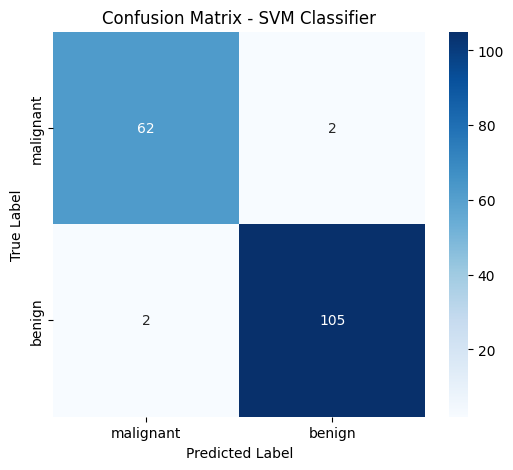

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [23]:
# SVM Classifier with Confusion Matrix Visualization using Seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
class_names = data.target_names

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM Classifier
svm = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

# 5. Predictions
y_pred = svm.predict(X_test_scaled)

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 7. Plot using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

# 8. Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE

In [24]:
# SVR Regression using Mean Absolute Error (MAE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load the dataset
X, y = fetch_california_housing(return_X_y=True)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Create Pipeline (Scaling + SVR)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1))
])

# 4. Train model
pipeline.fit(X_train, y_train)

# 5. Predict
y_pred = pipeline.predict(X_test)

# 6. Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # reference only (not required)

print("=== SVR Regression Performance ===")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score (optional): {r2:.4f}")


=== SVR Regression Performance ===
Mean Absolute Error (MAE): 0.3708
R² Score (optional): 0.7639


45.  Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score

=== Naive Bayes Performance (ROC-AUC) ===
ROC-AUC Score: 0.9892


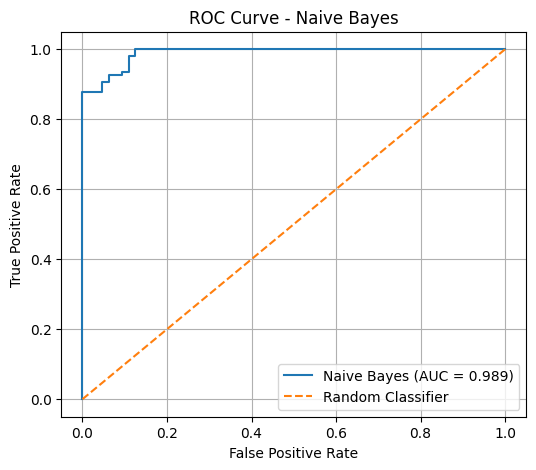

In [26]:
# Naive Bayes classifier evaluated with ROC-AUC score

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Load dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # binary: 0/1

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. (Optional) Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize Naive Bayes classifier
nb_clf = GaussianNB()

# 5. Train the model
nb_clf.fit(X_train_scaled, y_train)

# 6. Get predicted probabilities for the positive class
y_proba = nb_clf.predict_proba(X_test_scaled)[:, 1]

# 7. Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

print("=== Naive Bayes Performance (ROC-AUC) ===")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 8. (Optional) Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

Average Precision (AP): 0.9987


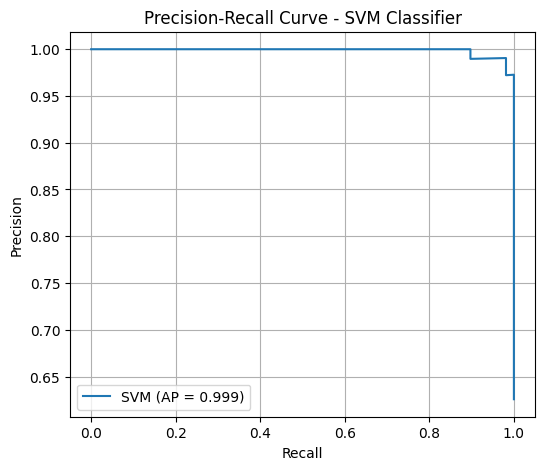

In [25]:
# SVM Classifier with Precision-Recall Curve Visualization

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Load dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # binary: 0/1

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM classifier with probability estimates enabled
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# 5. Get predicted probabilities for the positive class
y_scores = svm_clf.predict_proba(X_test_scaled)[:, 1]

# 6. Compute Precision-Recall curve and Average Precision
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

print(f"Average Precision (AP): {avg_precision:.4f}")

# 7. Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'SVM (AP = {avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
